In [26]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

In [4]:
sp500 = web.DataReader('^GSPC', data_source='yahoo', start='1/1/2010', end='03/30/2020')
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2577 entries, 2010-01-04 to 2020-03-30
Data columns (total 6 columns):
High         2577 non-null float64
Low          2577 non-null float64
Open         2577 non-null float64
Close        2577 non-null float64
Volume       2577 non-null int64
Adj Close    2577 non-null float64
dtypes: float64(5), int64(1)
memory usage: 140.9 KB


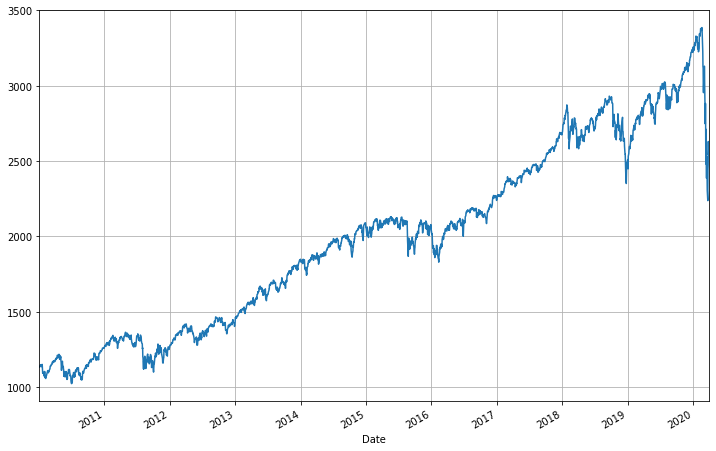

In [7]:
sp500['Adj Close'].plot(grid=True, figsize=(12,8));

In [9]:
sp500['42Days MAVG']= sp500['Adj Close'].rolling(42).mean()
sp500['252Days MAVG']= sp500['Adj Close'].rolling(252).mean()

In [10]:
sp500[['Adj Close', '42Days MAVG', '252Days MAVG']].tail()

,Adj Close,42Days MAVG,252Days MAVG
Date,,,
2020-03-24,2447.330078,3032.409738,3000.253006
2020-03-25,2475.560059,3012.888073,2998.892292
2020-03-26,2630.070068,2998.279506,2998.196657
2020-03-27,2541.469971,2980.784982,2997.109475
2020-03-30,2626.649902,2965.386172,2996.285070


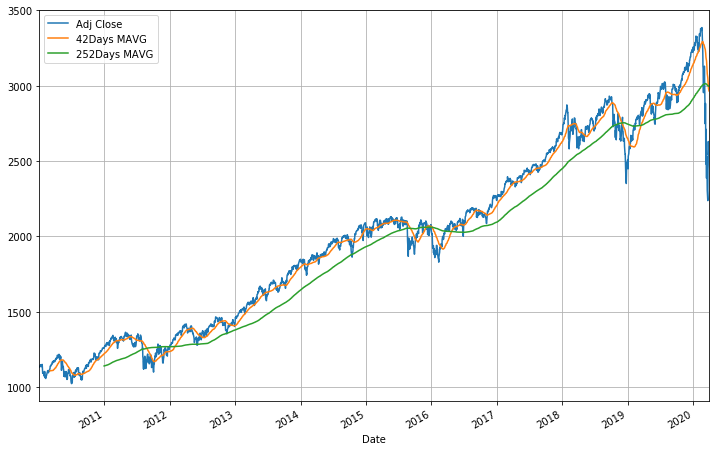

In [12]:
sp500[['Adj Close', '42Days MAVG', '252Days MAVG']].plot(grid=True, figsize=(12,8));

In [14]:
sp500['Difference 42-252']= sp500['42Days MAVG']- sp500['252Days MAVG']

In [15]:
SD=50
sp500['Regime'] = np.where(sp500['Difference 42-252'] > SD, 1, 0)
sp500['Regime'] = np.where(sp500['Difference 42-252'] < -SD, -1, sp500['Regime'])
sp500['Regime'].value_counts()

 1    1800
 0     594
-1     183
Name: Regime, dtype: int64

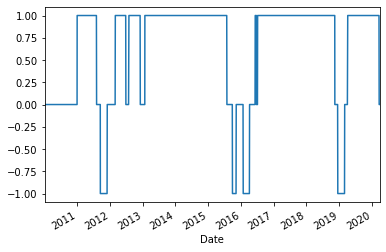

In [29]:
sp500['Regime'].plot(lw=1.5)
plt.ylim([-1.1,1.1]);

In [32]:
sp500['Market'] = np.log(sp500['Adj Close'] / sp500['Adj Close'].shift(1))

In [33]:
sp500['Strategy'] = sp500['Regime'].shift(1) * sp500['Market']

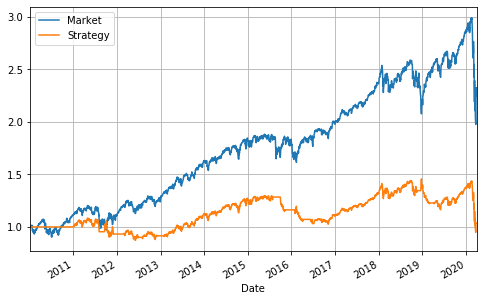

In [35]:
sp500[['Market', 'Strategy']].cumsum().apply(np.exp).plot(grid=True,
figsize=(8, 5));